## Define Gameweek and Periods for FDR calculation

In [1]:
gameweek = 3
next_n_games = 2

## Define Budget, Team Formation, and Budget Allocation by Position

In [2]:
#Budget
budget = 100

#Team Formation
DF = 3
MD = 4
ST = 3

#Total players needed per position
DF_max = 5
MD_max = 5
ST_max = 3

#Budget Allocation
GK_coef = 0.1
DF_coef = 0.24
MD_coef = 0.43
ST_coef = 0.23

## Scraped list of Schedules

In [190]:
schedules = ['Arsenal NEW (A) BUR (H) LIV (A) TOT (H) WAT (A) AVL (H) MUN (A) BOU (H) SHU (A) CRY (H) WOL (H) LEI (A) SOU (H) NOR (A) BHA (H) WHU (A) MCI (H) EVE (A) BOU (A) CHE (H) MUN (H) CRY (A) SHU (H) CHE (A) BUR (A) NEW (H) EVE (H) MCI (A) WHU (H) BHA (A) SOU (A) NOR (H) WOL (A) LEI (H) TOT (A) LIV (H) AVL (A) WAT (H)',
 'Aston Villa TOT (A) BOU (H) EVE (H) CRY (A) WHU (H) ARS (A) BUR (H) NOR (A) BHA (H) MCI (A) LIV (H) WOL (A) NEW (H) MUN (A) CHE (A) LEI (H) SHU (A) SOU (H) NOR (H) WAT (A) BUR (A) MCI (H) BHA (A) WAT (H) BOU (A) TOT (H) SOU (A) SHU (H) LEI (A) CHE (H) NEW (A) WOL (H) LIV (A) MUN (H) CRY (H) EVE (A) ARS (H) WHU (A)',
 'Bournemouth SHU (H) AVL (A) MCI (H) LEI (A) EVE (H) SOU (A) WHU (H) ARS (A) NOR (H) WAT (A) MUN (H) NEW (A) WOL (H) TOT (A) CRY (A) LIV (H) CHE (A) BUR (H) ARS (H) BHA (A) WHU (A) WAT (H) NOR (A) BHA (H) AVL (H) SHU (A) BUR (A) CHE (H) LIV (A) CRY (H) WOL (A) NEW (H) MUN (A) TOT (H) LEI (H) MCI (A) SOU (H) EVE (A)',
 'Brighton WAT (A) WHU (H) SOU (H) MCI (A) BUR (H) NEW (A) CHE (A) TOT (H) AVL (A) EVE (H) NOR (H) MUN (A) LEI (H) LIV (A) ARS (A) WOL (H) CRY (A) SHU (H) TOT (A) BOU (H) CHE (H) EVE (A) AVL (H) BOU (A) WHU (A) WAT (H) SHU (A) CRY (H) WOL (A) ARS (H) LEI (A) MUN (H) NOR (A) LIV (H) MCI (H) SOU (A) NEW (H) BUR (A)',
 'Burnley SOU (H) ARS (A) WOL (A) LIV (H) BHA (A) NOR (H) AVL (A) EVE (H) LEI (A) CHE (H) SHU (A) WHU (H) WAT (A) CRY (H) MCI (H) TOT (A) NEW (H) BOU (A) EVE (A) MUN (H) AVL (H) CHE (A) LEI (H) MUN (A) ARS (H) SOU (A) BOU (H) NEW (A) TOT (H) MCI (A) WAT (H) CRY (A) SHU (H) WHU (A) LIV (A) WOL (H) NOR (A) BHA (H)',
 'Chelsea MUN (A) LEI (H) NOR (A) SHU (H) WOL (A) LIV (H) BHA (H) SOU (A) NEW (H) BUR (A) WAT (A) CRY (H) MCI (A) WHU (H) AVL (H) EVE (A) BOU (H) TOT (A) SOU (H) ARS (A) BHA (A) BUR (H) NEW (A) ARS (H) LEI (A) MUN (H) TOT (H) BOU (A) EVE (H) AVL (A) MCI (H) WHU (A) WAT (H) CRY (A) SHU (A) NOR (H) LIV (A) WOL (H)',
 'Crystal Palace EVE (H) SHU (A) MUN (A) AVL (H) TOT (A) WOL (H) NOR (H) WHU (A) MCI (H) ARS (A) LEI (H) CHE (A) LIV (H) BUR (A) BOU (H) WAT (A) BHA (H) NEW (A) WHU (H) SOU (A) NOR (A) ARS (H) MCI (A) SOU (H) SHU (H) EVE (A) NEW (H) BHA (A) WAT (H) BOU (A) LIV (A) BUR (H) LEI (A) CHE (H) AVL (A) MUN (H) WOL (A) TOT (H)',
 'Everton CRY (A) WAT (H) AVL (A) WOL (H) BOU (A) SHU (H) MCI (H) BUR (A) WHU (H) BHA (A) TOT (H) SOU (A) NOR (H) LEI (A) LIV (A) CHE (H) MUN (A) ARS (H) BUR (H) NEW (A) MCI (A) BHA (H) WHU (A) NEW (H) WAT (A) CRY (H) ARS (A) MUN (H) CHE (A) LIV (H) NOR (A) LEI (H) TOT (A) SOU (H) WOL (A) AVL (H) SHU (A) BOU (H)',
 'Leicester WOL (H) CHE (A) SHU (A) BOU (H) MUN (A) TOT (H) NEW (H) LIV (A) BUR (H) SOU (A) CRY (A) ARS (H) BHA (A) EVE (H) WAT (H) AVL (A) NOR (H) MCI (A) LIV (H) WHU (A) NEW (A) SOU (H) BUR (A) WHU (H) CHE (H) WOL (A) MCI (H) NOR (A) AVL (H) WAT (A) BHA (H) EVE (A) CRY (H) ARS (A) BOU (A) SHU (H) TOT (A) MUN (H)',
 'Liverpool NOR (H) SOU (A) ARS (H) BUR (A) NEW (H) CHE (A) SHU (A) LEI (H) MUN (A) TOT (H) AVL (A) MCI (H) CRY (A) BHA (H) EVE (H) BOU (A) WAT (H) WHU (A) LEI (A) WOL (H) SHU (H) TOT (A) MUN (H) WOL (A) SOU (H) NOR (A) WHU (H) WAT (A) BOU (H) EVE (A) CRY (H) MCI (A) AVL (H) BHA (A) BUR (H) ARS (A) CHE (H) NEW (A)',
 'Man City WHU (A) TOT (H) BOU (A) BHA (H) NOR (A) WAT (H) EVE (A) WOL (H) CRY (A) AVL (H) SOU (H) LIV (A) CHE (H) NEW (A) BUR (A) MUN (H) ARS (A) LEI (H) WOL (A) SHU (H) EVE (H) AVL (A) CRY (H) SHU (A) TOT (A) WHU (H) LEI (A) ARS (H) MUN (A) BUR (H) CHE (A) LIV (H) SOU (A) NEW (H) BHA (A) BOU (H) WAT (A) NOR (H)',
 'Man Utd CHE (H) WOL (A) CRY (H) SOU (A) LEI (H) WHU (A) ARS (H) NEW (A) LIV (H) NOR (A) BOU (A) BHA (H) SHU (A) AVL (H) TOT (H) MCI (A) EVE (H) WAT (A) NEW (H) BUR (A) ARS (A) NOR (H) LIV (A) BUR (H) WOL (H) CHE (A) WAT (H) EVE (A) MCI (H) TOT (A) SHU (H) BHA (A) BOU (H) AVL (A) SOU (H) CRY (A) WHU (H) LEI (A)',
 'Newcastle ARS (H) NOR (A) TOT (A) WAT (H) LIV (A) BHA (H) LEI (A) MUN (H) CHE (A) WOL (H) WHU (A) BOU (H) AVL (A) MCI (H) SHU (A) SOU (H) BUR (A) CRY (H) MUN (A) EVE (H) LEI (H) WOL (A) CHE (H) EVE (A) NOR (H) ARS (A) CRY (A) BUR (H) SOU (A) SHU (H) AVL (H) BOU (A) WHU (H) MCI (A) WAT (A) TOT (H) BHA (A) LIV (H)',
 'Norwich LIV (A) NEW (H) CHE (H) WHU (A) MCI (H) BUR (A) CRY (A) AVL (H) BOU (A) MUN (H) BHA (A) WAT (H) EVE (A) ARS (H) SOU (A) SHU (H) LEI (A) WOL (H) AVL (A) TOT (H) CRY (H) MUN (A) BOU (H) TOT (A) NEW (A) LIV (H) WOL (A) LEI (H) SHU (A) SOU (H) EVE (H) ARS (A) BHA (H) WAT (A) WHU (H) CHE (A) BUR (H) MCI (A)',
 'Sheffield Utd BOU (A) CRY (H) LEI (H) CHE (A) SOU (H) EVE (A) LIV (H) WAT (A) ARS (H) WHU (A) BUR (H) TOT (A) MUN (H) WOL (A) NEW (H) NOR (A) AVL (H) BHA (A) WAT (H) MCI (A) LIV (A) WHU (H) ARS (A) MCI (H) CRY (A) BOU (H) BHA (H) AVL (A) NOR (H) NEW (A) MUN (A) TOT (H) BUR (A) WOL (H) CHE (H) LEI (A) EVE (H) SOU (A)',
 'Southampton BUR (A) LIV (H) BHA (A) MUN (H) SHU (A) BOU (H) TOT (A) CHE (H) WOL (A) LEI (H) MCI (A) EVE (H) ARS (A) WAT (H) NOR (H) NEW (A) WHU (H) AVL (A) CHE (A) CRY (H) TOT (H) LEI (A) WOL (H) CRY (A) LIV (A) BUR (H) AVL (H) WHU (A) NEW (H) NOR (A) ARS (H) WAT (A) MCI (H) EVE (A) MUN (A) BHA (H) BOU (A) SHU (H)',
 'Spurs AVL (H) MCI (A) NEW (H) ARS (A) CRY (H) LEI (A) SOU (H) BHA (A) WAT (H) LIV (A) EVE (A) SHU (H) WHU (A) BOU (H) MUN (A) BUR (H) WOL (A) CHE (H) BHA (H) NOR (A) SOU (A) LIV (H) WAT (A) NOR (H) MCI (H) AVL (A) CHE (A) WOL (H) BUR (A) MUN (H) WHU (H) SHU (A) EVE (H) BOU (A) ARS (H) NEW (A) LEI (H) CRY (A)',
 'Watford BHA (H) EVE (A) WHU (H) NEW (A) ARS (H) MCI (A) WOL (A) SHU (H) TOT (A) BOU (H) CHE (H) NOR (A) BUR (H) SOU (A) LEI (A) CRY (H) LIV (A) MUN (H) SHU (A) AVL (H) WOL (H) BOU (A) TOT (H) AVL (A) EVE (H) BHA (A) MUN (A) LIV (H) CRY (A) LEI (H) BUR (A) SOU (H) CHE (A) NOR (H) NEW (H) WHU (A) MCI (H) ARS (A)',
 'West Ham MCI (H) BHA (A) WAT (A) NOR (H) AVL (A) MUN (H) BOU (A) CRY (H) EVE (A) SHU (H) NEW (H) BUR (A) TOT (H) CHE (A) WOL (A) ARS (H) SOU (A) LIV (H) CRY (A) LEI (H) BOU (H) SHU (A) EVE (H) LEI (A) BHA (H) MCI (A) LIV (A) SOU (H) ARS (A) WOL (H) TOT (A) CHE (H) NEW (A) BUR (H) NOR (A) WAT (H) MUN (A) AVL (H)',
 'Wolves LEI (A) MUN (H) BUR (H) EVE (A) CHE (H) CRY (A) WAT (H) MCI (A) SOU (H) NEW (A) ARS (A) AVL (H) BOU (A) SHU (H) WHU (H) BHA (A) TOT (H) NOR (A) MCI (H) LIV (A) WAT (A) NEW (H) SOU (A) LIV (H) MUN (A) LEI (H) NOR (H) TOT (A) BHA (H) WHU (A) BOU (H) AVL (A) ARS (H) SHU (A) EVE (H) BUR (A) CRY (H) CHE (A)']

### Import Data

In [4]:
import json
import requests
import pandas as pd

# url = "https://fantasy.premierleague.com/drf/bootstrap-static"
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

def get_json_data(url):
    response = requests.get(url)
    jobs = response.json()
    return jobs

#filter out players with less than 330
all_players = get_json_data(url)['elements']
all_teams = get_json_data(url)['teams']
positions = get_json_data(url)['element_types']

### Get Team Table

In [175]:
table_url = 'https://www.premierleague.com/tables'

def build_table(table_url):
    team_table = pd.read_html(table_url)
    team_df = pd.DataFrame(team_table[0])
    team_df = team_df[team_df['Unnamed: 12'].isna()]
    team_df = team_df.iloc[:,1:10]
    team_df.Club = team_df.Club.map(lambda x: x[-3:])
    team_df.reset_index()
    team_df.index = np.arange(1, len(team_df) + 1)
    team_df.columns = ['Team', 'Played', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']
    team_df.index.name = 'Position'
    
    return team_df

In [176]:
table_df = build_table(table_url)

In [177]:
table_df.head()

,Team,Played,W,D,L,GF,GA,GD,Pts
Position,,,,,,,,,
1,LIV,2,2,0,0,6,2,+4,6
2,ARS,2,2,0,0,3,1,+2,6
3,MCI,2,1,1,0,7,2,+5,4
4,MUN,2,1,1,0,5,1,+4,4
5,BHA,2,1,1,0,4,1,+3,4


## Add player status and ROI, pts-per-90min metrics to final player_df

In [122]:
def attach_team_and_position(main_players, all_teams, positons):
    players = main_players.copy()
    for team in all_teams:
        for player in players:
            if team['code'] == player['team_code']:
                player['team_name'] = team['name']
    for position in positions:
        for player in players:
            if position['id'] == player['element_type']:
                player['position'] = position['singular_name']
    for player in players:
        if player['status'] == "a":
            player['status'] = "available"
        elif player['status'] == "d":
            player['status'] = "doubtful"
        elif player['status'] == "i":
            player['status'] = "injured"
        elif player['status'] == "s":
            player['status'] = "suspended"
    return players


#### Temporarily took out the "main_players" filter because no players have played 330 minutes ####

# player_positions_teams = attach_team_and_position(main_players, all_teams_new, positions)
player_positions_teams = attach_team_and_position(all_players, all_teams, positions)


def final_players_list(player_positions_teams):
    players = player_positions_teams.copy()
    empty = []
    for player in players:
        stats = dict(team_code = player['team_code'],
        team_name = player['team_name'],
        name = player['first_name'] + " " + player['second_name'],
        status = player['status'],
        position = player['position'],
        cost = (player['now_cost'])/10,
        total_points = player['total_points'],
        roi = round((player['total_points'] / player['now_cost'])*10, 2),
        pts_per_90min = round((player['total_points'] / (player['minutes'] + 1))*90, 2),
        bonus = player['bonus'],
        red_cards = player['red_cards'],
        minutes = player['minutes'],
        transfers_out = player['transfers_out'],
        transfers_in = player['transfers_in'])
        empty.append(stats)
    return empty

In [123]:
final = final_players_list(player_positions_teams)

In [124]:
final[0]

{'team_code': 3,
 'team_name': 'Arsenal',
 'name': 'Shkodran Mustafi',
 'status': 'available',
 'position': 'Defender',
 'cost': 5.4,
 'total_points': 0,
 'roi': 0.0,
 'pts_per_90min': 0.0,
 'bonus': 0,
 'red_cards': 0,
 'minutes': 0,
 'transfers_out': 14299,
 'transfers_in': 3344}

In [125]:
all_teams[0]

{'code': 3,
 'draw': 0,
 'form': None,
 'id': 1,
 'loss': 0,
 'name': 'Arsenal',
 'played': 0,
 'points': 0,
 'position': 0,
 'short_name': 'ARS',
 'strength': 4,
 'team_division': None,
 'unavailable': False,
 'win': 0,
 'strength_overall_home': 1250,
 'strength_overall_away': 1330,
 'strength_attack_home': 1240,
 'strength_attack_away': 1270,
 'strength_defence_home': 1290,
 'strength_defence_away': 1330}

In [126]:
final[0]

{'team_code': 3,
 'team_name': 'Arsenal',
 'name': 'Shkodran Mustafi',
 'status': 'available',
 'position': 'Defender',
 'cost': 5.4,
 'total_points': 0,
 'roi': 0.0,
 'pts_per_90min': 0.0,
 'bonus': 0,
 'red_cards': 0,
 'minutes': 0,
 'transfers_out': 14299,
 'transfers_in': 3344}

In [127]:
player_df = pd.DataFrame(final)

In [128]:
player_df.sort_values(by = ['roi'], ascending = False, inplace = True)

In [163]:
player_df.head()

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
374,4,4.1,167,John Lundstram,Defender,9.11,0,4.15,available,49,Sheffield Utd,17,434048,35488
348,4,6.8,172,Teemu Pukki,Forward,12.49,0,3.53,available,45,Norwich,24,1031771,59942
132,2,4.6,180,Erik Pieters,Defender,7.46,0,3.26,available,90,Burnley,15,257003,47728
90,4,4.6,180,Lewis Dunk,Defender,6.96,0,3.04,available,36,Brighton,14,275723,61545
516,2,5.0,180,Rui Pedro dos Santos Patrício,Goalkeeper,7.46,0,3.00,available,39,Wolves,15,81344,32453


### Merge two team tables s owe have all data

In [179]:
def merged_teams(table_df, all_teams):
    table_dic = table_df.to_dict('records')
    
    for team in table_dic:
        for item in all_teams:
            if team['Team'] == item['short_name']:
                team['code'] = item['code']
                team['name'] = item['name']
                team['strength'] = item['strength']
            
    new_df = pd.DataFrame(table_dic)
    
    new_order = ['code', 'strength', 'Team','name', 'Played', 'W', 'L', 'D', 'GF', 'GA', 'GD', 'Pts']
    
    table_df = new_df[new_order]
    
    table_df.index = np.arange(1, len(table_df) + 1)
    table_df.index.name = 'Position'
    
    return table_df
    

In [180]:
team_df = merged_teams(table_df, all_teams)

In [181]:
team_df.head()

,code,strength,Team,name,Played,W,L,D,GF,GA,GD,Pts
Position,,,,,,,,,,,,
1,14,5,LIV,Liverpool,2,2,0,0,6,2,+4,6
2,3,4,ARS,Arsenal,2,2,0,0,3,1,+2,6
3,43,5,MCI,Man City,2,1,0,1,7,2,+5,4
4,1,4,MUN,Man Utd,2,1,0,1,5,1,+4,4
5,36,2,BHA,Brighton,2,1,0,1,4,1,+3,4


In [207]:
team_names = list(team_df.name)

In [208]:
team_names.sort()

In [209]:
team_names

['Arsenal',
 'Aston Villa',
 'Bournemouth',
 'Brighton',
 'Burnley',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Leicester',
 'Liverpool',
 'Man City',
 'Man Utd',
 'Newcastle',
 'Norwich',
 'Sheffield Utd',
 'Southampton',
 'Spurs',
 'Watford',
 'West Ham',
 'Wolves']

## Create Schedule DF

In [210]:
def extract_sched(schedules):
    dic = {}
    for i, item in enumerate(schedules):
        name = item.partition(team_names[i])[1]
        sche = item.partition(team_names[i])[2]
        sche = sche.split()
        clean = [item for item in sche if item != "(A)"]
        clean2 = [item for item in clean if item != "(H)"]
        dic[name] = clean2
    return dic

In [211]:
wonders = extract_sched(schedules)

In [212]:
schedule_df = pd.DataFrame(wonders)

In [213]:
schedule_df.index.name = 'Gameweek'

In [215]:
schedule_df.head()

,Arsenal,Aston Villa,Bournemouth,Brighton,Burnley,Chelsea,Crystal Palace,Everton,Leicester,Liverpool,Man City,Man Utd,Newcastle,Norwich,Sheffield Utd,Southampton,Spurs,Watford,West Ham,Wolves
Gameweek,,,,,,,,,,,,,,,,,,,,
0,NEW,TOT,SHU,WAT,SOU,MUN,EVE,CRY,WOL,NOR,WHU,CHE,ARS,LIV,BOU,BUR,AVL,BHA,MCI,LEI
1,BUR,BOU,AVL,WHU,ARS,LEI,SHU,WAT,CHE,SOU,TOT,WOL,NOR,NEW,CRY,LIV,MCI,EVE,BHA,MUN
2,LIV,EVE,MCI,SOU,WOL,NOR,MUN,AVL,SHU,ARS,BOU,CRY,TOT,CHE,LEI,BHA,NEW,WHU,WAT,BUR
3,TOT,CRY,LEI,MCI,LIV,SHU,AVL,WOL,BOU,BUR,BHA,SOU,WAT,WHU,CHE,MUN,ARS,NEW,NOR,EVE
4,WAT,WHU,EVE,BUR,BHA,WOL,TOT,BOU,MUN,NEW,NOR,LEI,LIV,MCI,SOU,SHU,CRY,ARS,AVL,CHE


In [216]:
schedule_df.Arsenal[0:3]

Gameweek
0    NEW
1    BUR
2    LIV
Name: Arsenal, dtype: object

## Create FDR scores for calculating next-n opponents AVG strength

In [234]:
scores = list(zip(team_df.Team, team_df.strength))

In [235]:
scores = dict(scores)

In [236]:
sorted(scores.items(), key = lambda x: x[1], reverse = True)

[('LIV', 5),
 ('MCI', 5),
 ('ARS', 4),
 ('MUN', 4),
 ('TOT', 4),
 ('CHE', 4),
 ('BOU', 3),
 ('EVE', 3),
 ('BUR', 3),
 ('LEI', 3),
 ('WOL', 3),
 ('CRY', 3),
 ('WHU', 3),
 ('NEW', 3),
 ('SOU', 3),
 ('WAT', 3),
 ('BHA', 2),
 ('SHU', 2),
 ('NOR', 2),
 ('AVL', 2)]

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

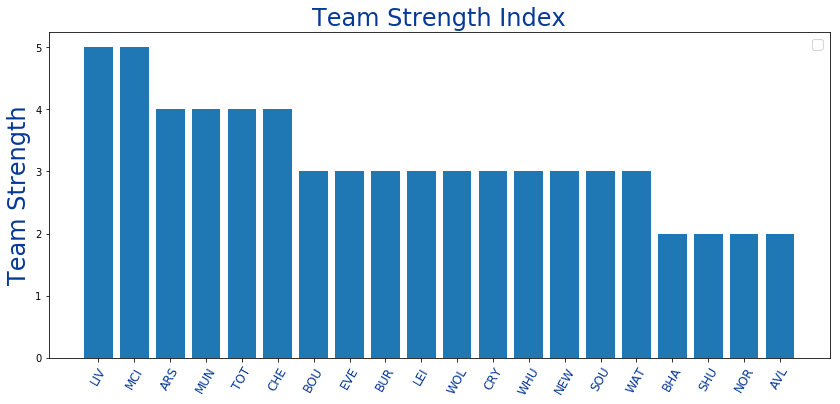

In [245]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

sorted_data = sorted(scores.items(), key = lambda x: x[1], reverse = True)

Team = [item[0] for item in sorted_data]
strength = [item[1] for item in sorted_data]

plt.bar(Team, strength)
plt.ylabel('Team Strength', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Team Strength Index', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

In [226]:
schedule_df.columns

Index(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brighton', 'Burnley',
       'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Liverpool',
       'Man City', 'Man Utd', 'Newcastle', 'Norwich', 'Sheffield Utd',
       'Southampton', 'Spurs', 'Watford', 'West Ham', 'Wolves'],
      dtype='object')

In [232]:
schedule_df.head()

,Arsenal,Aston Villa,Bournemouth,Brighton,Burnley,Chelsea,Crystal Palace,Everton,Leicester,Liverpool,Man City,Man Utd,Newcastle,Norwich,Sheffield Utd,Southampton,Spurs,Watford,West Ham,Wolves
Gameweek,,,,,,,,,,,,,,,,,,,,
0,NEW,TOT,SHU,WAT,SOU,MUN,EVE,CRY,WOL,NOR,WHU,CHE,ARS,LIV,BOU,BUR,AVL,BHA,MCI,LEI
1,BUR,BOU,AVL,WHU,ARS,LEI,SHU,WAT,CHE,SOU,TOT,WOL,NOR,NEW,CRY,LIV,MCI,EVE,BHA,MUN
2,LIV,EVE,MCI,SOU,WOL,NOR,MUN,AVL,SHU,ARS,BOU,CRY,TOT,CHE,LEI,BHA,NEW,WHU,WAT,BUR
3,TOT,CRY,LEI,MCI,LIV,SHU,AVL,WOL,BOU,BUR,BHA,SOU,WAT,WHU,CHE,MUN,ARS,NEW,NOR,EVE
4,WAT,WHU,EVE,BUR,BHA,WOL,TOT,BOU,MUN,NEW,NOR,LEI,LIV,MCI,SOU,SHU,CRY,ARS,AVL,CHE


In [238]:
def avg_FDR(week = gameweek, periods = next_n_games):
    dic = {}
    for team in schedule_df.columns:
        oponents = schedule_df[team][(week-1):(week+periods)]
        avg_FDR = round(sum([scores[oponent] for oponent in oponents])/len(oponents), 2)
        dic[team] = avg_FDR
    return dic

In [239]:
calculate_FDR = avg_FDR()

In [241]:
sorted(calculate_FDR.items(), key = lambda x: x[1], reverse = True)

[('Arsenal', 4.0),
 ('Newcastle', 4.0),
 ('Norwich', 4.0),
 ('Bournemouth', 3.67),
 ('Brighton', 3.67),
 ('Burnley', 3.33),
 ('Crystal Palace', 3.33),
 ('Liverpool', 3.33),
 ('Sheffield Utd', 3.33),
 ('Spurs', 3.33),
 ('Watford', 3.33),
 ('Wolves', 3.33),
 ('Aston Villa', 3.0),
 ('Leicester', 3.0),
 ('Man Utd', 3.0),
 ('Everton', 2.67),
 ('Southampton', 2.67),
 ('Chelsea', 2.33),
 ('Man City', 2.33),
 ('West Ham', 2.33)]

In [248]:
sorted_FDR = sorted(calculate_FDR.items(), key=lambda x: x[1], reverse=True)

In [249]:
sorted_FDR

[('Arsenal', 4.0),
 ('Newcastle', 4.0),
 ('Norwich', 4.0),
 ('Bournemouth', 3.67),
 ('Brighton', 3.67),
 ('Burnley', 3.33),
 ('Crystal Palace', 3.33),
 ('Liverpool', 3.33),
 ('Sheffield Utd', 3.33),
 ('Spurs', 3.33),
 ('Watford', 3.33),
 ('Wolves', 3.33),
 ('Aston Villa', 3.0),
 ('Leicester', 3.0),
 ('Man Utd', 3.0),
 ('Everton', 2.67),
 ('Southampton', 2.67),
 ('Chelsea', 2.33),
 ('Man City', 2.33),
 ('West Ham', 2.33)]

<function matplotlib.pyplot.show(*args, **kw)>

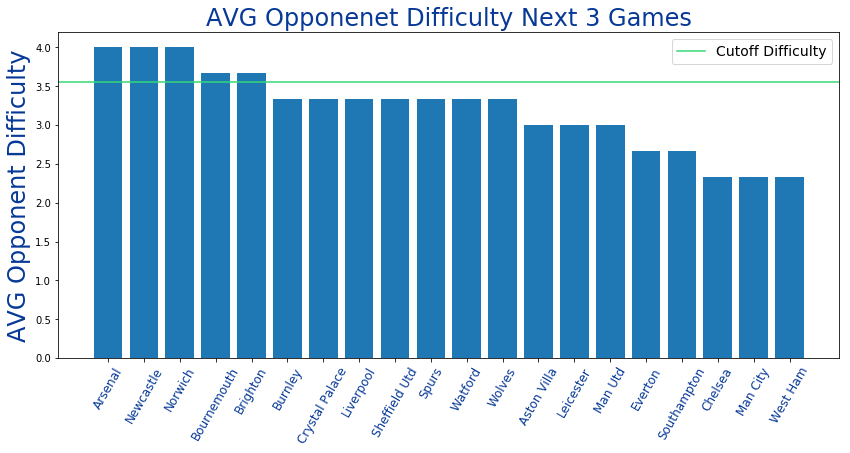

In [253]:
rcParams['figure.figsize'] = 14, 6

Team = [item[0] for item in sorted_FDR]
FDR = [item[1] for item in sorted_FDR]



plt.bar(Team, FDR)
plt.axhline(y=3.56, linestyle='-', color='#33D977', label='Cutoff Difficulty')
plt.ylabel('AVG Opponent Difficulty', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('AVG Opponenet Difficulty Next ' + str(next_n_games +1) + ' Games', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Clean final list of available players by FDR score <= 3.56 and status = 'available'

In [254]:
player_df.head()

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
374,4,4.1,167,John Lundstram,Defender,9.11,0,4.15,available,49,Sheffield Utd,17,434048,35488
348,4,6.8,172,Teemu Pukki,Forward,12.49,0,3.53,available,45,Norwich,24,1031771,59942
132,2,4.6,180,Erik Pieters,Defender,7.46,0,3.26,available,90,Burnley,15,257003,47728
90,4,4.6,180,Lewis Dunk,Defender,6.96,0,3.04,available,36,Brighton,14,275723,61545
516,2,5.0,180,Rui Pedro dos Santos Patrício,Goalkeeper,7.46,0,3.00,available,39,Wolves,15,81344,32453


In [255]:
player_df.shape

(529, 14)

In [256]:
clean_df = player_df[player_df.status == 'available']

In [257]:
clean_df.status.value_counts()

available    435
Name: status, dtype: int64

## Remove teams with FDR scores > 3.56 from DF - optional

In [258]:
teams_low_FDR = [key for (key,value) in calculate_FDR.items() if value <= 3.56]

In [259]:
teams_low_FDR

['Aston Villa',
 'Burnley',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Leicester',
 'Liverpool',
 'Man City',
 'Man Utd',
 'Sheffield Utd',
 'Southampton',
 'Spurs',
 'Watford',
 'West Ham',
 'Wolves']

In [260]:
clean_df.head()

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
374,4,4.1,167,John Lundstram,Defender,9.11,0,4.15,available,49,Sheffield Utd,17,434048,35488
348,4,6.8,172,Teemu Pukki,Forward,12.49,0,3.53,available,45,Norwich,24,1031771,59942
132,2,4.6,180,Erik Pieters,Defender,7.46,0,3.26,available,90,Burnley,15,257003,47728
90,4,4.6,180,Lewis Dunk,Defender,6.96,0,3.04,available,36,Brighton,14,275723,61545
516,2,5.0,180,Rui Pedro dos Santos Patrício,Goalkeeper,7.46,0,3.00,available,39,Wolves,15,81344,32453


In [261]:
final_df = clean_df.loc[clean_df.team_name.isin(teams_low_FDR)]

In [262]:
final_df.head(15)

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
374,4,4.1,167,John Lundstram,Defender,9.11,0,4.15,available,49,Sheffield Utd,17,434048,35488
132,2,4.6,180,Erik Pieters,Defender,7.46,0,3.26,available,90,Burnley,15,257003,47728
516,2,5.0,180,Rui Pedro dos Santos Patrício,Goalkeeper,7.46,0,3.00,available,39,Wolves,15,81344,32453
185,4,5.6,180,Yerry Mina,Defender,7.96,0,2.86,available,11,Everton,16,210098,35464
184,2,6.0,162,Lucas Digne,Defender,9.39,0,2.83,available,11,Everton,17,179498,157598
118,3,6.6,173,Ashley Barnes,Forward,9.31,0,2.73,available,90,Burnley,18,330742,69074
225,3,5.0,180,Wilfred Ndidi,Midfielder,6.46,0,2.60,available,13,Leicester,13,91864,23922
186,2,5.5,180,Michael Keane,Defender,6.96,0,2.55,available,11,Everton,14,52666,22219
387,2,4.5,180,Dean Henderson,Goalkeeper,5.47,0,2.44,available,49,Sheffield Utd,11,29284,10524
121,1,4.5,180,Nick Pope,Goalkeeper,5.47,0,2.44,available,90,Burnley,11,181266,53835


## Get list of players by ROI, Total Points and Points Per 90 min

In [263]:
d

In [264]:
players_roi[:2]

[{'name': 'John Lundstram',
  'position': 'Defender',
  'team': 'Sheffield Utd',
  'cost': 4.1,
  'points': 17,
  'minutes': 167,
  'ROI': 4.15,
  'pts_per_90min': 9.11},
 {'name': 'Erik Pieters',
  'position': 'Defender',
  'team': 'Burnley',
  'cost': 4.6,
  'points': 15,
  'minutes': 180,
  'ROI': 3.26,
  'pts_per_90min': 7.46}]

In [265]:
players_max_pts = sorted(players_roi, key = lambda x: x['points'], reverse = True)

In [266]:
players_max_pts[:2]

[{'name': 'Raheem Sterling',
  'position': 'Midfielder',
  'team': 'Man City',
  'cost': 12.2,
  'points': 26,
  'minutes': 180,
  'ROI': 2.13,
  'pts_per_90min': 12.93},
 {'name': 'Marcus Rashford',
  'position': 'Forward',
  'team': 'Man Utd',
  'cost': 8.6,
  'points': 19,
  'minutes': 173,
  'ROI': 2.21,
  'pts_per_90min': 9.83}]

In [267]:
players_90min = sorted(players_roi, key = lambda x: x['pts_per_90min'], reverse = True)

### Define min amount of minutes necessary to qualify for pts_per_90min stat

In [269]:
min_min = 45
players_90min = [player for player in players_90min if player['minutes'] >= min_min]

### Create player lists by position and metric we want to select by

In [270]:
GK_roi = [item for item in players_roi if item['position'] == 'Goalkeeper']
DF_roi = [item for item in players_roi if item['position'] == 'Defender']
MD_roi = [item for item in players_roi if item['position'] == 'Midfielder']
ST_roi = [item for item in players_roi if item['position'] == 'Forward']

In [271]:
GK_pts = [item for item in players_max_pts if item['position'] == 'Goalkeeper']
DF_pts = [item for item in players_max_pts if item['position'] == 'Defender']
MD_pts = [item for item in players_max_pts if item['position'] == 'Midfielder']
ST_pts = [item for item in players_max_pts if item['position'] == 'Forward']

In [272]:
GK_90min = [item for item in players_90min if item['position'] == 'Goalkeeper']
DF_90min = [item for item in players_90min if item['position'] == 'Defender']
MD_90min = [item for item in players_90min if item['position'] == 'Midfielder']
ST_90min = [item for item in players_90min if item['position'] == 'Forward']

## Start by selecting top GKs by ROI

In [273]:
#define money team as empty list and list that tracks count of players selectd per team
money_team = []
players_selected = []
teams_selected = []

#Instantiate initial count per position
#Current players selected for each position
DF_curr = 0
MD_curr = 0 
ST_curr = 0

GK_budget = budget*GK_coef
print(GK_budget)

for item in GK_roi:
    if item['cost'] <= 5.5 and item['cost'] <= GK_budget:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team'])
        GK_budget -= item['cost']
        print('Player Selected: ' + item['name'])
        print('GK budget left: ' + str(GK_budget))

print(players_selected)
print(teams_selected)

10.0
Player Selected: Rui Pedro dos Santos Patrício
GK budget left: 5.0
Player Selected: Dean Henderson
GK budget left: 0.5
['Rui Pedro dos Santos Patrício', 'Dean Henderson']
['Wolves', 'Sheffield Utd']


## Select Top player by points from DF, MD, ST

In [274]:
DF_budget = budget*DF_coef + GK_budget
MD_budget = budget*MD_coef
ST_budget = budget*ST_coef

print(DF_budget, MD_budget, ST_budget)

#Select Top Defender
money_team.append(DF_pts[0])
players_selected.append(DF_pts[0]['name'])
teams_selected.append(DF_pts[0]['team'])
DF_budget -= DF_pts[0]['cost']
DF_curr += 1
print('Player Selected: ' + DF_pts[0]['name'])
print('DF budget left: ' + str(DF_budget))

#Select Top Midfielder
money_team.append(MD_pts[0])
players_selected.append(MD_pts[0]['name'])
teams_selected.append(MD_pts[0]['team'])
MD_budget -= MD_pts[0]['cost']
MD_curr += 1
print('Player Selected: ' + MD_pts[0]['name'])
print('MD budget left: ' + str(MD_budget))


print(players_selected)
print(teams_selected)

24.5 43.0 23.0
Player Selected: John Lundstram
DF budget left: 20.4
Player Selected: Raheem Sterling
MD budget left: 30.8
['Rui Pedro dos Santos Patrício', 'Dean Henderson', 'John Lundstram', 'Raheem Sterling']
['Wolves', 'Sheffield Utd', 'Sheffield Utd', 'Man City']


In [275]:
#Select Top Striker

for item in ST_pts[:3]:
    if teams_selected.count(item['team']) < 3 and len(money_team) == 4:
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team'])
            ST_budget -= item['cost']
            ST_curr += 1
            print('Player Selected: ' + item['name'])
            print('ST budget left: ' + str(ST_budget))
    break

print(len(money_team))
print(players_selected)
print(teams_selected)

Player Selected: Marcus Rashford
ST budget left: 14.4
5
['Rui Pedro dos Santos Patrício', 'Dean Henderson', 'John Lundstram', 'Raheem Sterling', 'Marcus Rashford']
['Wolves', 'Sheffield Utd', 'Sheffield Utd', 'Man City', 'Man Utd']


In [276]:
print(DF_curr, MD_curr, ST_curr)

1 1 1


In [277]:
print(DF, MD, ST)

3 4 3


### Fill rest of team with top ROI players

In [278]:
for item in DF_roi:
    if teams_selected.count(item['team']) < 3 and item['name'] not in players_selected and item['cost'] < DF_budget and DF_curr < DF:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team'])
        DF_budget -= item['cost']
        DF_curr += 1
        print('Player Selected: ' + item['name'])
        print('DF budget left: ' + str(DF_budget))
    else:
        if teams_selected.count(item['team']) < 3 and item['name'] not in players_selected and DF_max != DF_curr and item['cost'] <= DF_budget / (DF_max - DF_curr):
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team'])
            DF_budget -= item['cost']
            DF_curr += 1
            print('Player Selected: ' + item['name'])
            print('DF budget left: ' + str(DF_budget))
            
            
print(len(money_team))
print(players_selected)
print(teams_selected)                       

Player Selected: Erik Pieters
DF budget left: 15.799999999999999
Player Selected: Yerry Mina
DF budget left: 10.2
Player Selected: Willy Boly
DF budget left: 5.199999999999999
Player Selected: Jonny Evans
DF budget left: 0.1999999999999993
9
['Rui Pedro dos Santos Patrício', 'Dean Henderson', 'John Lundstram', 'Raheem Sterling', 'Marcus Rashford', 'Erik Pieters', 'Yerry Mina', 'Willy Boly', 'Jonny Evans']
['Wolves', 'Sheffield Utd', 'Sheffield Utd', 'Man City', 'Man Utd', 'Burnley', 'Everton', 'Wolves', 'Leicester']


## Fill MD position

In [279]:
#move leftover DF budget to MD budget
MD_budget += DF_budget

for item in MD_roi:
    if teams_selected.count(item['team']) < 3 and item['name'] not in players_selected and item['cost'] < MD_budget and MD_curr < MD:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team'])
        MD_budget -= item['cost']
        MD_curr += 1
        print('Player Selected: ' + item['name'])
        print('MD budget left: ' + str(MD_budget))
    else:
        if teams_selected.count(item['team']) < 3 and item['name'] not in players_selected and MD_max != MD_curr and item['cost'] <= MD_budget / (MD_max - MD_curr):
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team'])
            MD_budget -= item['cost']
            MD_curr += 1
            print('Player Selected: ' + item['name'])
            print('MD budget left: ' + str(MD_budget))
            
            
print(len(money_team))
print(players_selected)
print(teams_selected) 

Player Selected: Wilfred Ndidi
MD budget left: 26.0
Player Selected: Tanguy Ndombele
MD budget left: 19.9
Player Selected: Douglas Luiz Soares de Paulo
MD budget left: 15.399999999999999
Player Selected: Erik Lamela
MD budget left: 9.399999999999999
13
['Rui Pedro dos Santos Patrício', 'Dean Henderson', 'John Lundstram', 'Raheem Sterling', 'Marcus Rashford', 'Erik Pieters', 'Yerry Mina', 'Willy Boly', 'Jonny Evans', 'Wilfred Ndidi', 'Tanguy Ndombele', 'Douglas Luiz Soares de Paulo', 'Erik Lamela']
['Wolves', 'Sheffield Utd', 'Sheffield Utd', 'Man City', 'Man Utd', 'Burnley', 'Everton', 'Wolves', 'Leicester', 'Leicester', 'Spurs', 'Aston Villa', 'Spurs']


## Fill ST position

In [280]:
#move leftover MD budget to ST budget
ST_budget += MD_budget

for item in ST_roi:
    if teams_selected.count(item['team']) < 3 and item['name'] not in players_selected and item['cost'] < ST_budget and ST_curr < ST:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team'])
        ST_budget -= item['cost']
        ST_curr += 1
        print('Player Selected: ' + item['name'])
        print('ST budget left: ' + str(ST_budget))
    else:
        if teams_selected.count(item['team']) < 3 and item['name'] not in players_selected and ST_max != ST_curr and item['cost'] <= ST_budget / (ST_max - ST_curr):
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team'])
            ST_budget -= item['cost']
            ST_curr += 1
            print('Player Selected: ' + item['name'])
            print('ST budget left: ' + str(ST_budget))
            
            
print(len(money_team))
print(players_selected)
print(teams_selected) 

Player Selected: Ashley Barnes
ST budget left: 17.199999999999996
Player Selected: Divock Origi
ST budget left: 11.599999999999996
15
['Rui Pedro dos Santos Patrício', 'Dean Henderson', 'John Lundstram', 'Raheem Sterling', 'Marcus Rashford', 'Erik Pieters', 'Yerry Mina', 'Willy Boly', 'Jonny Evans', 'Wilfred Ndidi', 'Tanguy Ndombele', 'Douglas Luiz Soares de Paulo', 'Erik Lamela', 'Ashley Barnes', 'Divock Origi']
['Wolves', 'Sheffield Utd', 'Sheffield Utd', 'Man City', 'Man Utd', 'Burnley', 'Everton', 'Wolves', 'Leicester', 'Leicester', 'Spurs', 'Aston Villa', 'Spurs', 'Burnley', 'Liverpool']


In [281]:
money_df = pd.DataFrame(money_team)

In [282]:
money_df

,ROI,cost,minutes,name,points,position,pts_per_90min,team
0,3.00,5.0,180,Rui Pedro dos Santos Patrício,15,Goalkeeper,7.46,Wolves
1,2.44,4.5,180,Dean Henderson,11,Goalkeeper,5.47,Sheffield Utd
2,4.15,4.1,167,John Lundstram,17,Defender,9.11,Sheffield Utd
3,2.13,12.2,180,Raheem Sterling,26,Midfielder,12.93,Man City
4,2.21,8.6,173,Marcus Rashford,19,Forward,9.83,Man Utd
5,3.26,4.6,180,Erik Pieters,15,Defender,7.46,Burnley
6,2.86,5.6,180,Yerry Mina,16,Defender,7.96,Everton
7,2.20,5.0,180,Willy Boly,11,Defender,5.47,Wolves
8,2.00,5.0,180,Jonny Evans,10,Defender,4.97,Leicester
9,2.60,5.0,180,Wilfred Ndidi,13,Midfielder,6.46,Leicester


In [283]:
ST_df = pd.DataFrame(ST_roi)
ST_df.head()

,ROI,cost,minutes,name,points,position,pts_per_90min,team
0,2.73,6.6,173,Ashley Barnes,18,Forward,9.31,Burnley
1,2.32,5.6,84,Divock Origi,13,Forward,13.76,Liverpool
2,2.21,8.6,173,Marcus Rashford,19,Forward,9.83,Man Utd
3,1.50,6.0,106,Javier Hernández Balcázar,9,Forward,7.57,West Ham
4,1.37,9.5,175,Roberto Firmino,13,Forward,6.65,Liverpool


In [284]:
DF_df = pd.DataFrame(DF_roi)
DF_df.head()

,ROI,cost,minutes,name,points,position,pts_per_90min,team
0,4.15,4.1,167,John Lundstram,17,Defender,9.11,Sheffield Utd
1,3.26,4.6,180,Erik Pieters,15,Defender,7.46,Burnley
2,2.86,5.6,180,Yerry Mina,16,Defender,7.96,Everton
3,2.83,6.0,162,Lucas Digne,17,Defender,9.39,Everton
4,2.55,5.5,180,Michael Keane,14,Defender,6.96,Everton


In [285]:
MD_df = pd.DataFrame(MD_roi)
MD_df.head()

,ROI,cost,minutes,name,points,position,pts_per_90min,team
0,2.60,5.0,180,Wilfred Ndidi,13,Midfielder,6.46,Leicester
1,2.30,6.1,180,Tanguy Ndombele,14,Midfielder,6.96,Spurs
2,2.22,4.5,98,Douglas Luiz Soares de Paulo,10,Midfielder,9.09,Aston Villa
3,2.17,6.0,171,Erik Lamela,13,Midfielder,6.80,Spurs
4,2.13,12.2,180,Raheem Sterling,26,Midfielder,12.93,Man City


In [286]:
ST_df = pd.DataFrame(ST_roi)
ST_df.head()

,ROI,cost,minutes,name,points,position,pts_per_90min,team
0,2.73,6.6,173,Ashley Barnes,18,Forward,9.31,Burnley
1,2.32,5.6,84,Divock Origi,13,Forward,13.76,Liverpool
2,2.21,8.6,173,Marcus Rashford,19,Forward,9.83,Man Utd
3,1.50,6.0,106,Javier Hernández Balcázar,9,Forward,7.57,West Ham
4,1.37,9.5,175,Roberto Firmino,13,Forward,6.65,Liverpool


## Define Clean df for graphing purposes

In [287]:
clean_df.head()

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
374,4,4.1,167,John Lundstram,Defender,9.11,0,4.15,available,49,Sheffield Utd,17,434048,35488
348,4,6.8,172,Teemu Pukki,Forward,12.49,0,3.53,available,45,Norwich,24,1031771,59942
132,2,4.6,180,Erik Pieters,Defender,7.46,0,3.26,available,90,Burnley,15,257003,47728
90,4,4.6,180,Lewis Dunk,Defender,6.96,0,3.04,available,36,Brighton,14,275723,61545
516,2,5.0,180,Rui Pedro dos Santos Patrício,Goalkeeper,7.46,0,3.00,available,39,Wolves,15,81344,32453


In [288]:
graph_roi = []
for row, player in clean_df.iterrows():
    playa = dict(name = player['name'], position = player.position, team=player.team_name, cost = player.cost, points = player.total_points, minutes = player.minutes, ROI = player.roi, pts_per_90min = player.pts_per_90min)
    graph_roi.append(playa)

In [289]:
GK_graph = clean_df[clean_df['position'] == 'Goalkeeper']
DF_graph = clean_df[clean_df['position'] == 'Defender']
MD_graph = clean_df[clean_df['position'] == 'Midfielder']
ST_graph = clean_df[clean_df['position'] == 'Forward']

In [290]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

## Top 10 Keepers

<function matplotlib.pyplot.show(*args, **kw)>

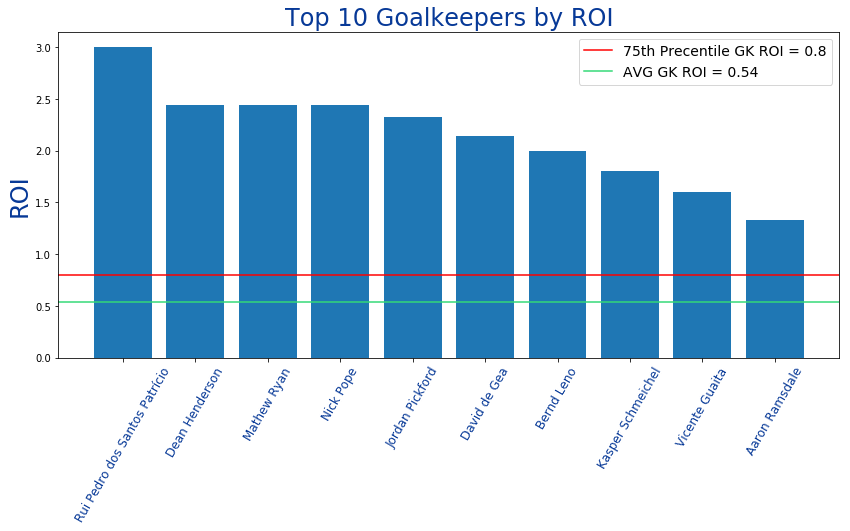

In [291]:
GK_x = GK_graph[:10].roi
GK_y = GK_graph[:10].name
GK_75th = round(GK_graph.describe().roi['75%'], 2)
GK_AVG = round(GK_graph.describe().roi['mean'], 2)

plt.bar(GK_y, GK_x)
plt.axhline(y=GK_75th, color='r', linestyle='-', label='75th Precentile GK ROI = ' + str(GK_75th))
plt.axhline(y=GK_AVG, color='#33D977', linestyle='-', label='AVG GK ROI = ' + str(GK_AVG))
plt.ylabel('ROI', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Goalkeepers by ROI', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Top 10 Defenders

<function matplotlib.pyplot.show(*args, **kw)>

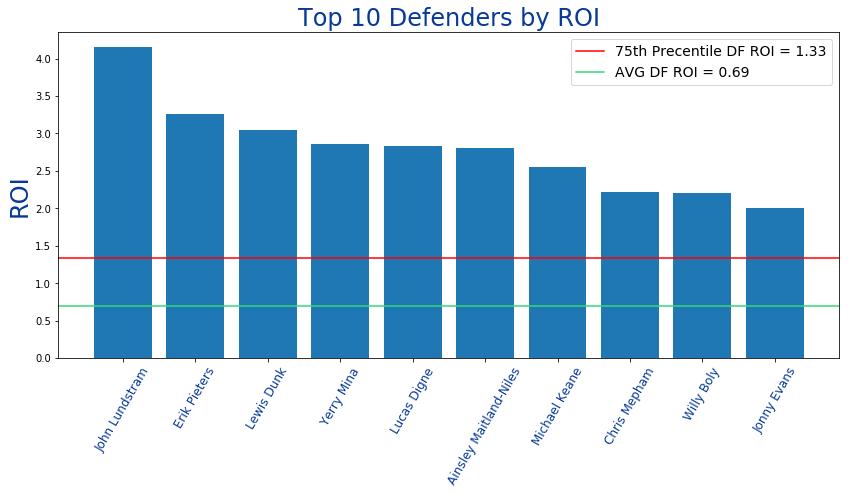

In [292]:
DF_x = DF_graph[:10].roi
DF_y = DF_graph[:10].name
DF_75th = round(DF_graph.describe().roi['75%'], 2)
DF_AVG = round(DF_graph.describe().roi['mean'], 2)

plt.bar(DF_y, DF_x)
plt.axhline(y=DF_75th, color='r', linestyle='-', label='75th Precentile DF ROI = ' + str(DF_75th))
plt.axhline(y=DF_AVG, color='#33D977', linestyle='-', label='AVG DF ROI = ' + str(DF_AVG))
plt.ylabel('ROI', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Defenders by ROI', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Top 10 MIdfielders

<function matplotlib.pyplot.show(*args, **kw)>

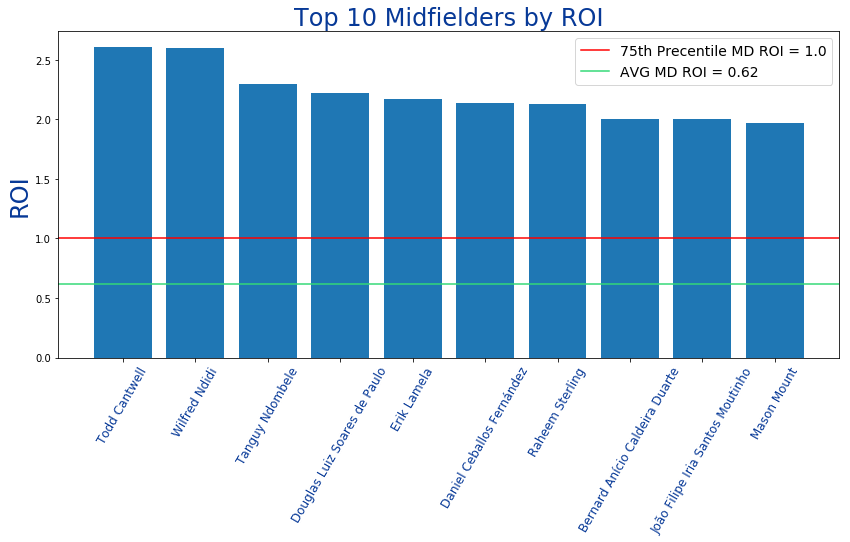

In [293]:
MD_x = MD_graph[:10].roi
MD_y = MD_graph[:10].name
MD_75th = round(MD_graph.describe().roi['75%'], 2)
MD_AVG = round(MD_graph.describe().roi['mean'], 2)

plt.bar(MD_y, MD_x)
plt.axhline(y=MD_75th, color='r', linestyle='-', label='75th Precentile MD ROI = ' + str(MD_75th))
plt.axhline(y=MD_AVG, color='#33D977', linestyle='-', label='AVG MD ROI = ' + str(MD_AVG))
plt.ylabel('ROI', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Midfielders by ROI', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Top 10 Strikers

<function matplotlib.pyplot.show(*args, **kw)>

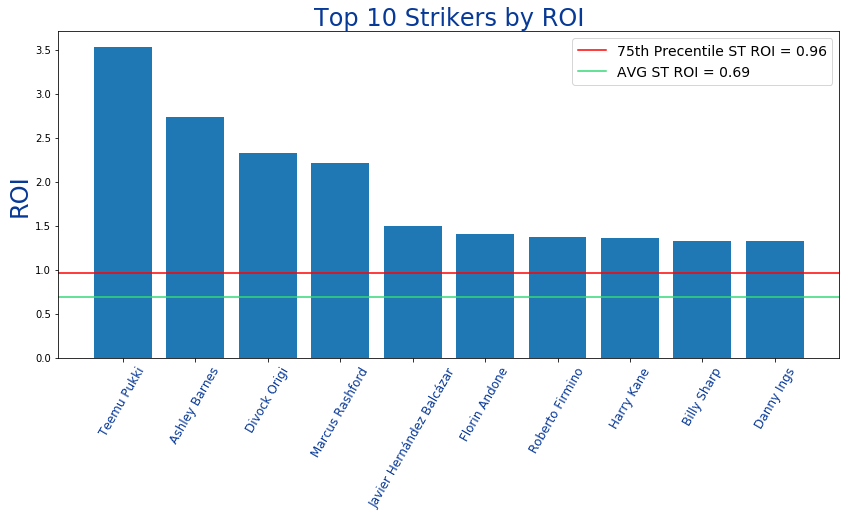

In [294]:
ST_x = ST_graph[:10].roi
ST_y = ST_graph[:10].name
ST_75th = round(ST_graph.describe().roi['75%'], 2)
ST_AVG = round(ST_graph.describe().roi['mean'], 2)

plt.bar(ST_y, ST_x)
plt.axhline(y=ST_75th, color='r', linestyle='-', label='75th Precentile ST ROI = ' + str(ST_75th))
plt.axhline(y=ST_AVG, color='#33D977', linestyle='-', label='AVG ST ROI = ' + str(ST_AVG))
plt.ylabel('ROI', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Strikers by ROI', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

In [305]:
team_df

,code,strength,Team,name,Played,W,L,D,GF,GA,GD,Pts
Position,,,,,,,,,,,,
1,14,5,LIV,Liverpool,2,2,0,0,6,2,+4,6
2,3,4,ARS,Arsenal,2,2,0,0,3,1,+2,6
3,43,5,MCI,Man City,2,1,0,1,7,2,+5,4
4,1,4,MUN,Man Utd,2,1,0,1,5,1,+4,4
5,36,2,BHA,Brighton,2,1,0,1,4,1,+3,4
6,6,4,TOT,Spurs,2,1,0,1,5,3,+2,4
7,91,3,BOU,Bournemouth,2,1,0,1,3,2,+1,4
8,49,2,SHU,Sheffield Utd,2,1,0,1,2,1,+1,4
9,11,3,EVE,Everton,2,1,0,1,1,0,+1,4


### Team Stats

In [314]:
teams_stats = team_df.iloc[:,2:12]

In [315]:
teams_stats

,Team,name,Played,W,L,D,GF,GA,GD,Pts
Position,,,,,,,,,,
1,LIV,Liverpool,2,2,0,0,6,2,+4,6
2,ARS,Arsenal,2,2,0,0,3,1,+2,6
3,MCI,Man City,2,1,0,1,7,2,+5,4
4,MUN,Man Utd,2,1,0,1,5,1,+4,4
5,BHA,Brighton,2,1,0,1,4,1,+3,4
6,TOT,Spurs,2,1,0,1,5,3,+2,4
7,BOU,Bournemouth,2,1,0,1,3,2,+1,4
8,SHU,Sheffield Utd,2,1,0,1,2,1,+1,4
9,EVE,Everton,2,1,0,1,1,0,+1,4


### Worst/ Best  Defence vs. Offence

In [364]:
defence_df = teams_stats.sort_values(by = ['GA'], ascending = False)

In [366]:
defence_df.head()

,Team,name,Played,W,L,D,GF,GA,GD,Pts
Position,,,,,,,,,,
16,WHU,West Ham,2,0,1,1,1,6,-5,1
11,NOR,Norwich,2,1,1,0,4,5,-1,3
15,CHE,Chelsea,2,0,1,1,1,5,-4,1
19,SOU,Southampton,2,0,2,0,1,5,-4,0
17,AVL,Aston Villa,2,0,2,0,2,5,-3,0


In [367]:
GA = list(zip(defence_df.name, defence_df.GA))
GA_bottom5 = GA[:5]
GA_top5 = GA[-5:]

In [368]:
GA_bottom5, GA_top5

([('West Ham', '6'),
  ('Norwich', '5'),
  ('Chelsea', '5'),
  ('Southampton', '5'),
  ('Aston Villa', '5')],
 [('Wolves', '1'),
  ('Crystal Palace', '1'),
  ('Brighton', '1'),
  ('Man Utd', '1'),
  ('Everton', '0')])

In [434]:
teams_stats.GA.median()

2.0

<function matplotlib.pyplot.show(*args, **kw)>

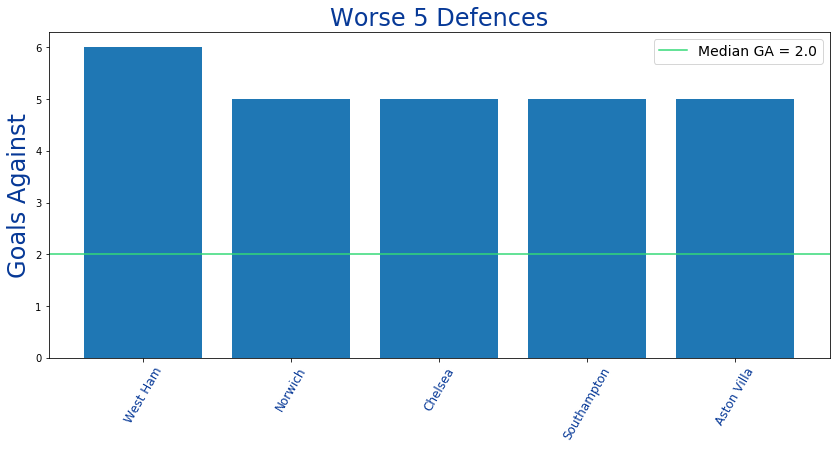

In [449]:
X = [item[0] for item in GA_bottom5]
Y = [int(item[1]) for item in GA_bottom5]

median = teams_stats.GA.median()

plt.bar(X, Y)
plt.ylim(bottom=0)
plt.axhline(y=median, color='#33D977', linestyle='-', label='Median GA = ' + str(median))
plt.ylabel('Goals Against', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Worse 5 Defences', fontsize = 24, color = '#073997')
plt.legend(fontsize = 14)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

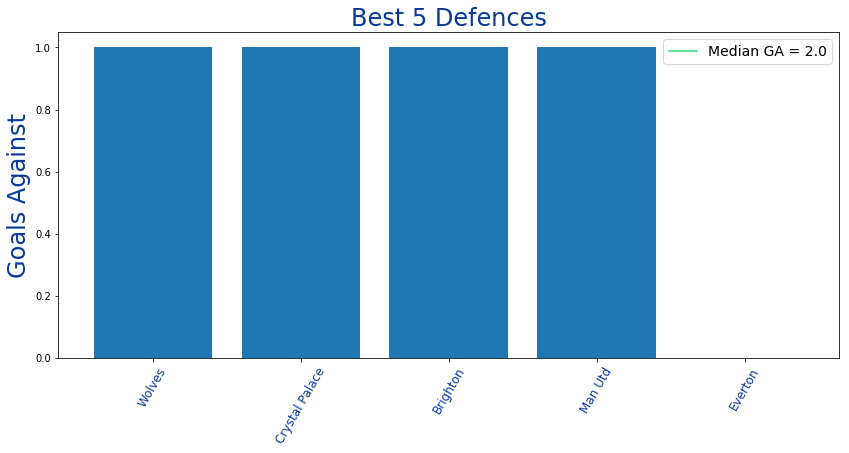

In [450]:
X = [item[0] for item in GA_top5]
Y = [int(item[1]) for item in GA_top5]

median = teams_stats.GA.median()

plt.bar(X, Y)
plt.ylim(bottom=0)
plt.axhline(y=median, color='#33D977', linestyle='-', label='Median GA = ' + str(median))
plt.ylabel('Goals Against', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Best 5 Defences', fontsize = 24, color = '#073997')
plt.legend(fontsize = 14)
plt.show

In [369]:
offense_df = teams_stats.sort_values(by = ['GF'], ascending = False)

In [451]:
offense_df.head()

,Team,name,Played,W,L,D,GF,GA,GD,Pts
Position,,,,,,,,,,
3,MCI,Man City,2,1,0,1,7,2,+5,4
1,LIV,Liverpool,2,2,0,0,6,2,+4,6
6,TOT,Spurs,2,1,0,1,5,3,+2,4
4,MUN,Man Utd,2,1,0,1,5,1,+4,4
10,BUR,Burnley,2,1,1,0,4,2,+2,3


In [372]:
GF = list(zip(offense_df.name, offense_df.GF))
GF_top5 = GF[:5]
GF_bottom5 = GF[-5:]

In [373]:
GF_top5, GF_bottom5

([('Man City', '7'),
  ('Liverpool', '6'),
  ('Spurs', '5'),
  ('Man Utd', '5'),
  ('Burnley', '4')],
 [('West Ham', '1'),
  ('Newcastle', '1'),
  ('Southampton', '1'),
  ('Crystal Palace', '0'),
  ('Watford', '0')])

<function matplotlib.pyplot.show(*args, **kw)>

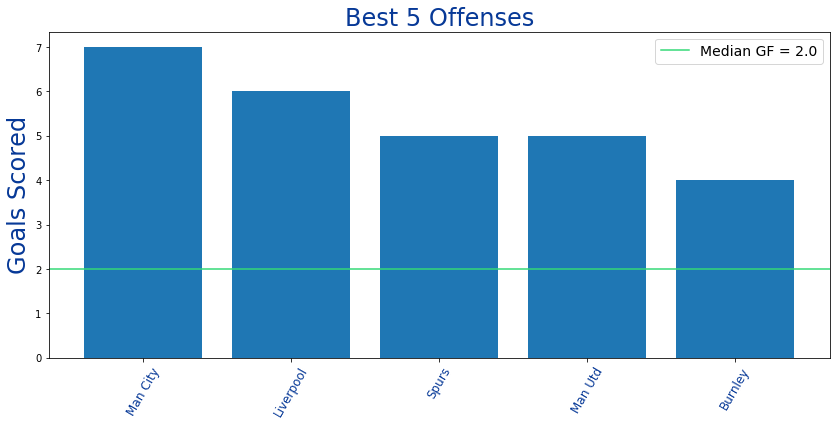

In [452]:
X = [item[0] for item in GF_top5]
Y = [int(item[1]) for item in GF_top5]

median = teams_stats.GF.median()

plt.bar(X, Y)
plt.ylim(bottom=0)
plt.axhline(y=median, color='#33D977', linestyle='-', label='Median GF = ' + str(median))
plt.ylabel('Goals Scored', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Best 5 Offenses', fontsize = 24, color = '#073997')
plt.legend(fontsize = 14)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

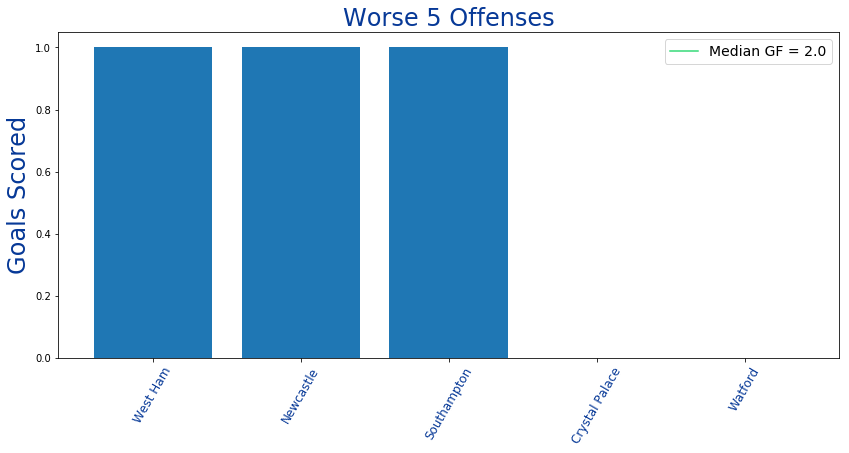

In [453]:
X = [item[0] for item in GF_bottom5]
Y = [int(item[1]) for item in GF_bottom5]

median = teams_stats.GF.median()

plt.bar(X, Y)
plt.ylim(bottom=0)
plt.axhline(y=median, color='#33D977', linestyle='-', label='Median GF = ' + str(median))
plt.ylabel('Goals Scored', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Worse 5 Offenses', fontsize = 24, color = '#073997')
plt.legend(fontsize = 14)
plt.show

In [319]:
stats_df = player_df[player_df.minutes >= 35]

In [320]:
stats_df.head()

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
374,4,4.1,167,John Lundstram,Defender,9.11,0,4.15,available,49,Sheffield Utd,17,434048,35488
348,4,6.8,172,Teemu Pukki,Forward,12.49,0,3.53,available,45,Norwich,24,1031771,59942
132,2,4.6,180,Erik Pieters,Defender,7.46,0,3.26,available,90,Burnley,15,257003,47728
90,4,4.6,180,Lewis Dunk,Defender,6.96,0,3.04,available,36,Brighton,14,275723,61545
516,2,5.0,180,Rui Pedro dos Santos Patrício,Goalkeeper,7.46,0,3.00,available,39,Wolves,15,81344,32453


### Cobine Team and Player Stats

In [339]:
team_dic = {item:[] for item in team_names}

for row, player in stats_df.iterrows():
    for name in team_names:
        if player.team_name == name:
            playa = dict(name = player['name'], position = player.position, cost = player.cost, minutes = player.minutes, 
                         points = player.total_points,  roi = player.roi, pts_per_90min = player.pts_per_90min, 
                         bonus = player.bonus, red_cards = player.red_cards)
            team_dic[name].append(playa)

In [374]:
team_dic['Liverpool']

[{'name': 'Divock Origi',
  'position': 'Forward',
  'cost': 5.6,
  'minutes': 84,
  'points': 13,
  'roi': 2.32,
  'pts_per_90min': 13.76,
  'bonus': 3,
  'red_cards': 0},
 {'name': 'Virgil van Dijk',
  'position': 'Defender',
  'cost': 6.5,
  'minutes': 180,
  'points': 10,
  'roi': 1.54,
  'pts_per_90min': 4.97,
  'bonus': 0,
  'red_cards': 0},
 {'name': 'Roberto Firmino',
  'position': 'Forward',
  'cost': 9.5,
  'minutes': 175,
  'points': 13,
  'roi': 1.37,
  'pts_per_90min': 6.65,
  'bonus': 2,
  'red_cards': 0},
 {'name': 'James Milner',
  'position': 'Midfielder',
  'cost': 5.5,
  'minutes': 77,
  'points': 7,
  'roi': 1.27,
  'pts_per_90min': 8.08,
  'bonus': 0,
  'red_cards': 0},
 {'name': 'Sadio Mané',
  'position': 'Midfielder',
  'cost': 11.5,
  'minutes': 106,
  'points': 14,
  'roi': 1.22,
  'pts_per_90min': 11.78,
  'bonus': 3,
  'red_cards': 0},
 {'name': 'Mohamed Salah',
  'position': 'Midfielder',
  'cost': 12.5,
  'minutes': 168,
  'points': 15,
  'roi': 1.2,
  'pt

### Get Final Stats per Team using Pandas

In [408]:
team_stats = {item:{} for item in team_names}

for team in team_names:
    active_players = len(stats_df[stats_df.team_name == team].cost)
    tot_cost = round(stats_df[stats_df.team_name == team].cost.sum(), 3)
    tot_pts = round(stats_df[stats_df.team_name == team].total_points.sum(), 3)
    team_roi = round(tot_pts / tot_cost, 3)
    avg_player_roi = round(tot_pts / active_players, 3)
    
    stats = dict(active_players = active_players, tot_cost = tot_cost, tot_pts = tot_pts, team_roi = team_roi, 
               avg_player_roi = avg_player_roi)
    
    team_stats[team].update(stats)
    
    

In [409]:
team_stats['Newcastle']

{'active_players': 14,
 'tot_cost': 69.5,
 'tot_pts': 45,
 'team_roi': 0.647,
 'avg_player_roi': 3.214}

In [412]:
team_stats_df = pd.DataFrame(team_stats).T

In [414]:
team_stats_df.sort_values(by = ['avg_player_roi'], ascending = False, inplace = True)

In [415]:
team_stats_df

,active_players,avg_player_roi,team_roi,tot_cost,tot_pts
Man Utd,12.0,9.083,1.451,75.1,109.0
Man City,15.0,8.600,1.141,113.1,129.0
Everton,13.0,8.385,1.389,78.5,109.0
Burnley,12.0,8.333,1.538,65.0,100.0
Wolves,12.0,7.417,1.348,66.0,89.0
Brighton,14.0,7.357,1.419,72.6,103.0
Leicester,12.0,7.167,1.248,68.9,86.0
Spurs,12.0,7.000,1.091,77.0,84.0
Arsenal,15.0,6.733,1.081,93.4,101.0
Sheffield Utd,13.0,6.692,1.357,64.1,87.0
